<a href="https://colab.research.google.com/github/Jenn035/SIM_YAC_GUALE_UPSE/blob/main/PRACTICA%20%20SEMANA%202%20Comparacion_de_esquemas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import numpy  as np 
import math


In [115]:
L=10000
dx=250
Tiempo=100000
DT=1
K=50 #Permeabilidad MD
por=0.2
vis=1 # centipoise
Beta=1
CompTotal=1**(-6) #ps1-1
A=200000#ft^2

 


In [116]:
Alpha=K/(vis*por*CompTotal)
Alpha
Eta=(Alpha*DT)/(dx**2)
Eta

0.004

In [117]:
#Esquema Explicito 
def Presdt(P0,P1,P2,Eta):
  Pdt=P1+Eta*(P0-2*P1+P2)
  return(Pdt)

Pexplicita=np.zeros((Tiempo//DT,L//dx))



In [118]:
#Condiciones inicialea 
Pyac=1000
Piz=0
Pder=0
Pin=np.ones(L//dx)
Pres=np.zeros(L//dx)
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder

Pin

array([   0., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000.,    0.])

In [119]:
t=DT
Pexplicita[0]=Pin
Pexplicita.shape
while t<Tiempo:
  for i in range(0,len(Pin)-1):
    if i==0:
      Pres[i]=Pin[0]
    elif i==len(Pin)-1:
      Pres[i]=Pin[len(Pin)-1]
    else:
      Pres[i]=Presdt(Pin[i-1],Pin[i],Pin[i+1],Eta)
  Pexplicita[t//DT]=Pres
  t=t+DT
  Pin=Pres    


In [120]:
Pexplicita

array([[   0.        , 1000.        , 1000.        , ..., 1000.        ,
        1000.        ,    0.        ],
       [   0.        ,  996.        , 1000.        , ..., 1000.        ,
         996.        ,    0.        ],
       [   0.        ,  992.032     ,  999.968128  , ...,  999.984     ,
         992.031936  ,    0.        ],
       ...,
       [   0.        ,    7.57317434,   15.09703718, ...,   15.09016928,
           7.56953207,    0.        ],
       [   0.        ,    7.57297709,   15.09664397, ...,   15.08977625,
           7.56933492,    0.        ],
       [   0.        ,    7.57277985,   15.09625078, ...,   15.08938323,
           7.56913777,    0.        ]])

In [108]:
#Esquema Implicito
Pexplicita=np.zeros((Tiempo//DT,L//dx))
Pimplicita=np.zeros((Tiempo//DT,L//dx))
Pin=np.ones(L//dx)
Pres=np.zeros(L//dx)
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder
N=L//dx
Matriz_resolucion=np.zeros([N-2,N-2])


In [121]:
for i in range (N-2): #resolver sistemas de ecuaciones
  Matriz_resolucion[i,i]=1+2*Eta #porque en la diagonal los indices de la matriz son iguale i= j x eso se coloca i, i
  if i>0:#desde la fila uno tenemos lamda
    Matriz_resolucion[i,i-1]=Eta
  if i<(N-3): 
    Matriz_resolucion[i,i+1]=Eta # parte derecha de la diagonal

In [122]:
Pcal=np.zeros([N-2]) #vector vacios para guardar los resultados
Pcal=np.linalg.solve(Matriz_resolucion,Pin[1:-1])

In [123]:
Pcal.shape

(38,)

In [86]:
Pres=np.concatenate(([Piz],Pcal,[Pder]))
Pres

array([2000.       ,  999.8800144,  999.8800144,    0.       ])

In [124]:
Pimplicita[0]=Pin
t=DT
while t<Tiempo:
  Pcal=np.linalg.solve(Matriz_resolucion,Pin[1:-1]) #linalgresuelve la matriz automaticamente
  Pres=np.concatenate(([Piz],Pcal,[Pder]))
  Pimplicita[t//DT]=Pres
  Pin=Pres
  t=t+DT


In [125]:
Pimplicita

array([[ 0.00000000e+00,  7.57277985e+00,  1.50962508e+01, ...,
         1.50893832e+01,  7.56913777e+00,  0.00000000e+00],
       [ 0.00000000e+00,  7.45371455e+00,  1.48588947e+01, ...,
         1.48521336e+01,  7.45012821e+00,  0.00000000e+00],
       [ 0.00000000e+00,  7.33652130e+00,  1.46252705e+01, ...,
         1.46186143e+01,  7.33298984e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  6.15512338e-10, -1.22703284e-09, ...,
         1.22703179e-09, -6.15511809e-10,  0.00000000e+00],
       [ 0.00000000e+00,  6.15496371e-10, -1.22700101e-09, ...,
         1.22699996e-09, -6.15495842e-10,  0.00000000e+00],
       [ 0.00000000e+00,  6.15480405e-10, -1.22696918e-09, ...,
         1.22696813e-09, -6.15479876e-10,  0.00000000e+00]])

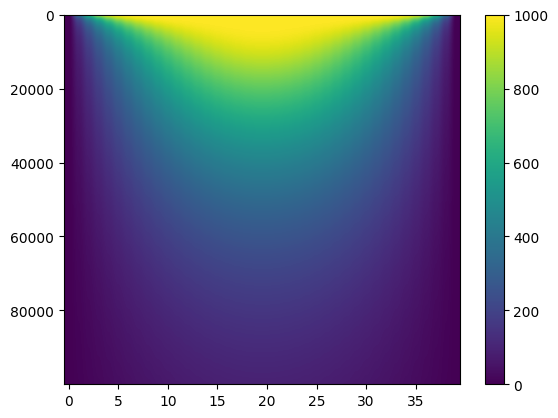

In [126]:
import matplotlib.pyplot as plt 

imgplot = plt.imshow(Pexplicita,aspect='auto')
plt.colorbar()



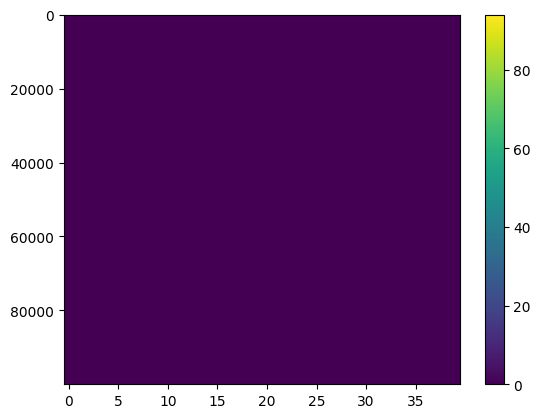

In [127]:
import matplotlib.pyplot as plt 

imgplot = plt.imshow(Pimplicita,aspect='auto')
plt.colorbar()
